In [8]:
%run graph_operator.py


In [17]:
if __name__ == "__main__":

    lob = nx.random_lobster(5, 0.6, 0.9, seed = 37)
    g1 = GraphOperator(lob, "adjacency")
    g2 = GraphOperator(lob, "combinatorial laplacian")
    g3 = GraphOperator(lob, "normalized laplacian")
    

In [19]:
g1

LaplacianGraph, cached = True, matrix_type = adjacency
random_lobster(5,0.6,0.9)

In [23]:
display(g1.adjacency)

  (0, 1)	1.0
  (0, 7)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (3, 9)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 11)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (5, 13)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 8)	1.0
  (8, 7)	1.0
  (9, 3)	1.0
  (9, 10)	1.0
  (10, 9)	1.0
  (11, 4)	1.0
  (11, 12)	1.0
  (12, 11)	1.0
  (13, 5)	1.0
  (13, 14)	1.0
  (14, 13)	1.0


In [11]:
g2.plot_eigenvals()

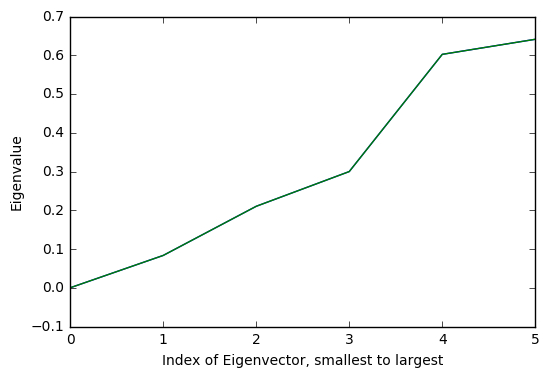

In [12]:
g2.plot_eigenvals()
plt.show()

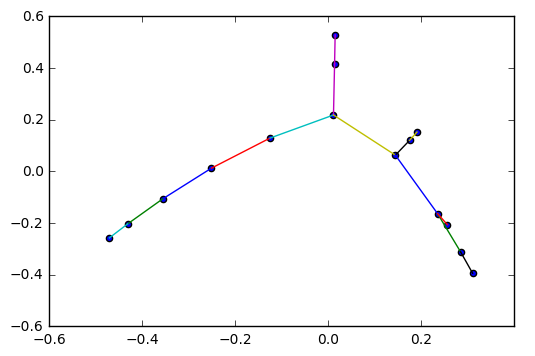

In [13]:
g2.plot_eigenvectors()
plt.show()

In [14]:
g3.compute()

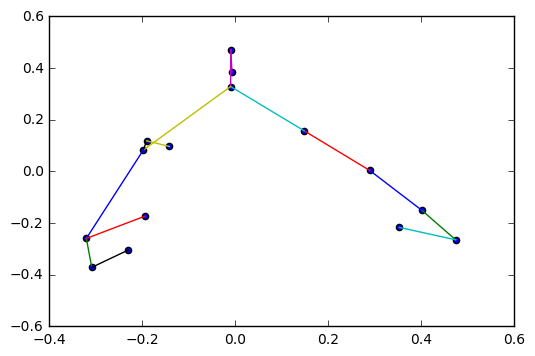

In [15]:
g3.plot_eigenvectors()
plt.show()

In [16]:
vec = g2.eigvecs[:,1]

len(vec)

15

In [141]:
def partition(secondEigVec, standardVal = 0):
    A = []
    B = []
    for i in range(0, len(secondEigVec)):
        if (secondEigVec[i] >= standardVal):
            A.append(i)
        else:
            B.append(i)
    return (A,B)

In [142]:
(A, C) = partition(vec, 0)

In [143]:
edgelist = g2._graph.edges()

In [177]:
from networkx.algorithms import bipartite

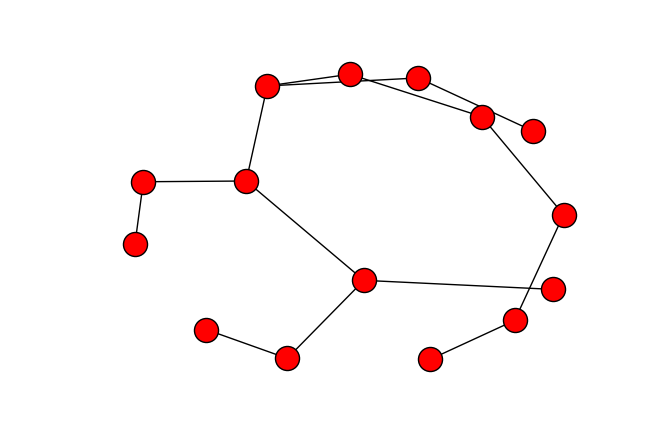

In [187]:
nx.draw(g2._graph)
plt.show()

In [188]:
B = nx.Graph()
B.add_nodes_from(A, bipartite=0)
B.add_nodes_from(C, bipartite=1)
B.add_edges_from(edgelist)

In [189]:
# bipartite.color(B)
color = bipartite.color(B)
pos = nx.spring_layout(B)
#color

In [190]:
nx.set_node_attributes(g2._graph, 'bipartite', color)

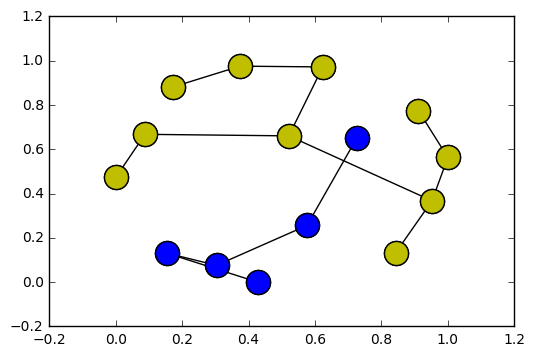

In [201]:
nx.draw_networkx_nodes(g2._graph, pos, nodelist = A, node_color='y')
nx.draw_networkx_nodes(g2._graph, pos, nodelist = C, node_color='b')
nx.draw_networkx_edges(g2._graph, pos, edgelist=removeEdge(edgelist, A, C))
plt.show()

In [197]:
g2._graph.nodes()
#g2._graph.edges()
#edgelist
for (i,j) in edgelist:
    print(i,"lalala", j)

(0, 'lalala', 1)
(0, 'lalala', 7)
(1, 'lalala', 2)
(2, 'lalala', 3)
(3, 'lalala', 9)
(3, 'lalala', 4)
(4, 'lalala', 11)
(4, 'lalala', 5)
(5, 'lalala', 13)
(5, 'lalala', 6)
(7, 'lalala', 8)
(9, 'lalala', 10)
(11, 'lalala', 12)
(13, 'lalala', 14)


In [199]:
def removeEdge(edgelist, A, B):
    for (i,j) in edgelist:
        if ((i in A and j in B) or (i in B and j in A)):
            edgelist.remove((i,j))
    return edgelist